# Advanced Spam Detection Model

We are Building an advanced Spam Detection Model for Messages, using Natural Language Processing (NLP) techniques and an Advanced Deep Learning-based approach.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

### Load dataset

In [2]:
df = pd.read_csv('dataset\spam.csv')
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

### Text preprocessing

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    return words

#### Build vocabulary

In [6]:
all_words = []
for msg in df['message']:
    all_words.extend(preprocess_text(msg))
vocab = {word: i for i, (word, _) in enumerate(Counter(all_words).most_common(5000))} 

#### Convert text to feature vectors

In [7]:
def text_to_vector(text, vocab):
    vector = np.zeros(len(vocab))
    for word in preprocess_text(text):
        if word in vocab:
            vector[vocab[word]] += 1
    return vector

In [8]:
X = np.array([text_to_vector(msg, vocab) for msg in df['message']])
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize neural network parameters

In [9]:
input_size = len(vocab)
hidden_size = 128
output_size = 1
learning_rate = 0.01
epochs = 100
batch_size = 32

In [10]:
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
b2 = np.zeros((1, output_size))

#### Activation functions

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [15]:
def relu(z):
    return np.maximum(0, z)

In [16]:
def relu_derivative(z):
    return (z > 0).astype(float)


#### Forward propagation

In [17]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

#### Backpropagation

In [18]:
def backward_propagation(X, y_true, Z1, A1, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - y_true.reshape(-1, 1)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

### Training loop

In [19]:
loss_history = []
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        Z1, A1, Z2, A2 = forward_propagation(X_batch, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X_batch, y_batch, Z1, A1, A2, W1, W2)
        
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
    
    loss = np.mean(-(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2)))
    loss_history.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")


Epoch 0: Loss = 0.4724
Epoch 10: Loss = 0.5308
Epoch 20: Loss = 0.7154
Epoch 30: Loss = 0.8484
Epoch 40: Loss = 0.9428
Epoch 50: Loss = 1.0153
Epoch 60: Loss = 1.0749
Epoch 70: Loss = 1.1269
Epoch 80: Loss = 1.1734
Epoch 90: Loss = 1.2154


### Plot loss curve

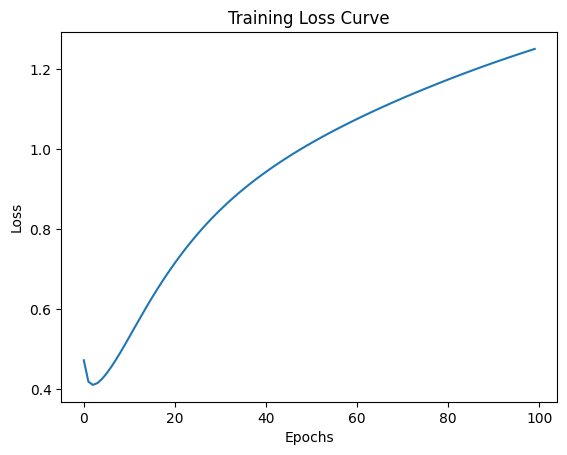

In [20]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

### Evaluate model

In [21]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

In [22]:
y_pred = predict(X_test, W1, b1, W2, b2)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Test Accuracy: 0.9883
Precision: 0.9789
Recall: 0.9329
F1 Score: 0.9553
